#**Main Idea with main dataset (4096 shots)**

In [ ]:
#!pip install qiskit qiskit-ibm-runtime qiskit-algorithms pylatexenc qiskit-aer
#!pip install pandas scikit-learn matplotlib seaborn rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=473d1bac4a64f4fce8cb1297a59d3a63352b99a29ff15714e8e7617f45e511f3
  Stored in 

✅ Target Backend: ibm_torino

--- 1. PREPARING DATASET (250 Molecules) ---


[15:51:14] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] WARNING: not removing hydrogen atom without neighbors
[15:51:14] Explicit valence for atom # 11 N, 4, is greater than permitted
[15:51:14] Explicit valence for atom # 12 N, 4, is greater than permitted
[15:51:14] Explicit valence for atom # 5 N, 4, is greater than permitted
[15:51:14] Explicit valence for atom # 5 N, 4, is greater than permitted
[15:51:14] Explicit valence for 

Dataset Ready: 250 molecules.

--- 2. GENERATING DATA ---
Running Classical Generation...


[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerator
[15:51:14] DEPRECATION WARNING: please use MorganGenerat

Running Quantum Simulator (Local)...
Simulator Data Saved.

🚀 SUBMITTING HIGH-PRECISION RUN TO: ibm_torino...
Transpiling circuits...
Starting execution of 5 batches (4096 Shots per circuit)...
  - Processing Batch 1/5...
    Job ID: d5sd1q8ubqnc73c4ilh0 (Queueing...)
    Batch Complete.
  - Processing Batch 2/5...
    Job ID: d5sdc6gubqnc73c4j0l0 (Queueing...)
    Batch Complete.
  - Processing Batch 3/5...
    Job ID: d5sde0neglic739vb2a0 (Queueing...)
    Batch Complete.
  - Processing Batch 4/5...
    Job ID: d5sdf4veglic739vb3e0 (Queueing...)
    Batch Complete.
  - Processing Batch 5/5...
    Job ID: d5sdfooubqnc73c4j470 (Queueing...)
    Batch Complete.
✅ High-Quality Data Saved to 'X_q_hardware_high_quality.npy'.

--- 3. THE FINAL COMPARISON ---
------------------------------
Classical Accuracy: 66.0%
Simulator Accuracy: 86.0%
Hardware Accuracy:  84.0%
------------------------------


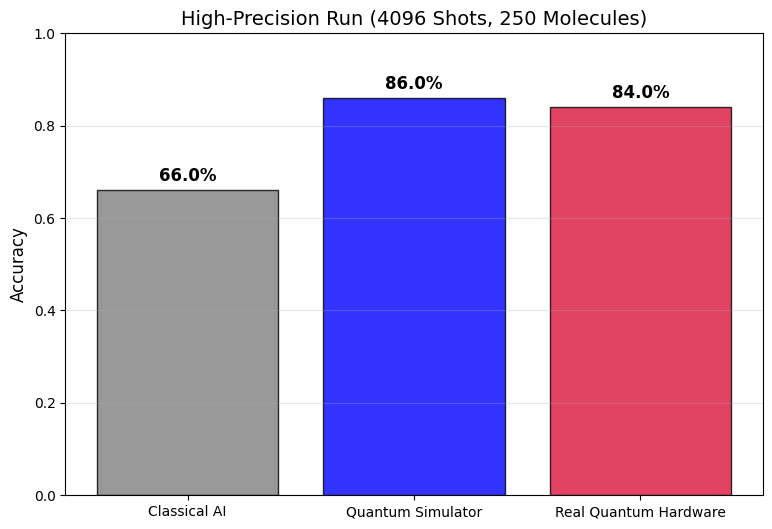

In [1]:

import os
import time
import numpy as np
import pandas as pd
import requests
import io
import warnings
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import AllChem

# Quantum Imports
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler

# IBM Hardware Imports (V2)
try:
    from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
except ImportError:
    !pip install qiskit-ibm-runtime
    from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

warnings.filterwarnings('ignore')

# 1. AUTHENTICATE
# Paste your token below
token = "token"
instance = "crn"

try:
    QiskitRuntimeService.save_account(
        token=token,
        channel="ibm_cloud",
        instance=instance,
        name="Soko",
        overwrite=True
    )
except:
    pass # Account might already be saved
service = QiskitRuntimeService(name="Soko")
backend = service.backend("ibm_torino")
print(f"✅ Target Backend: {backend.name}")

# 2. PREPARE EXACTLY 250 MOLECULES (Balanced)
print("\n--- 1. PREPARING DATASET (250 Molecules) ---")
try:
    url = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv"
    s = requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))
except:
    raise ValueError("Error loading data.")

df = df[df['smiles'].str.len() < 70]
def is_valid(smiles):
    try:
        return Chem.MolFromSmiles(smiles) is not None
    except: return False
df = df[df['smiles'].apply(is_valid)]

df_perm = df[df['p_np'] == 1]
df_non = df[df['p_np'] == 0]
n_select = 125
df_final = pd.concat([df_perm.sample(n=n_select, random_state=42),
                      df_non.sample(n=n_select, random_state=42)]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset Ready: {len(df_final)} molecules.")
y = df_final['p_np'].values

# 3. DEFINE THE WINNING LOGIC (Structure-Only, Scale=0.1)
EN_MAP = {'H': 2.20, 'Li': 0.98, 'Be': 1.57, 'B': 2.04, 'C': 2.55, 'N': 3.04, 'O': 3.44, 'F': 3.98,
          'Na': 0.93, 'Mg': 1.31, 'Al': 1.61, 'Si': 1.90, 'P': 2.19, 'S': 2.58, 'Cl': 3.16,
          'K': 0.82, 'Ca': 1.00, 'Br': 2.96, 'I': 2.66}

def qmse_structure_final(smiles):
    angle_scale = 0.1 # <--- Winning Parameter
    n_qubits = 12
    mol = Chem.MolFromSmiles(smiles)
    if not mol: return QuantumCircuit(n_qubits)

    atoms = [a for a in mol.GetAtoms()]
    qc = QuantumCircuit(n_qubits)
    n_exact = 10
    backbone = atoms[:n_exact]
    tail = atoms[n_exact:]
    mol_to_qubit = {atom.GetIdx(): i for i, atom in enumerate(backbone)}

    # Structure
    for atom in backbone:
        en = EN_MAP.get(atom.GetSymbol(), 1.0)
        qc.ry((en**2) * angle_scale, mol_to_qubit[atom.GetIdx()])

    # Tail
    if tail:
        tail_A = tail[0::2]
        tail_B = tail[1::2]
        if tail_A: qc.ry(sum(EN_MAP.get(a.GetSymbol(), 1.0) for a in tail_A) * (angle_scale/2), 10)
        if tail_B: qc.ry(sum(EN_MAP.get(a.GetSymbol(), 1.0) for a in tail_B) * (angle_scale/2), 11)

    # Bonds (Fixed 0.5 Scale)
    for bond in mol.GetBonds():
        idx1, idx2 = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        q1, q2 = mol_to_qubit.get(idx1), mol_to_qubit.get(idx2)
        b_type = bond.GetBondTypeAsDouble()
        if q1 is not None and q2 is not None:
            qc.rxx(b_type * 0.5, q1, q2)
        elif (q1 is not None and q2 is None):
            qc.rxx(0.5, q1, 10); qc.rxx(0.5, q1, 11)
        elif (q1 is None and q2 is not None):
            qc.rxx(0.5, q2, 10); qc.rxx(0.5, q2, 11)
    qc.measure_all()
    return qc

# 4. RUN GENERATION
print("\n--- 2. GENERATING DATA ---")

# A. CLASSICAL
print("Running Classical Generation...")
X_c = np.array([np.array(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=256)) for s in df_final['smiles']])

# B. SIMULATOR (Local Baseline)
if os.path.exists("X_q_sim_250.npy"):
    print("Loading Simulator data from disk...")
    X_q_sim = np.load("X_q_sim_250.npy")
else:
    print("Running Quantum Simulator (Local)...")
    circuits = [qmse_structure_final(s) for s in df_final['smiles']]
    sampler_sim = StatevectorSampler()
    X_q_sim = []
    batch_size = 50
    for i in range(0, len(circuits), batch_size):
        batch = circuits[i:i+batch_size]
        result = sampler_sim.run(batch, shots=1024).result()
        for j in range(len(batch)):
            counts = result[j].data.meas.get_counts()
            probs = np.zeros(2**12)
            total = sum(counts.values())
            for b, c in counts.items():
                probs[int(b, 2)] = c / total
            X_q_sim.append(probs)
    X_q_sim = np.array(X_q_sim)
    np.save("X_q_sim_250.npy", X_q_sim)
    print("Simulator Data Saved.")

# C. HARDWARE (High Precision - 4096 Shots)
X_q_real = None
FILENAME = "X_q_hardware_high_quality.npy" # New filename

if os.path.exists(FILENAME):
    print(f"\n✅ FOUND SAVED HIGH-QUALITY DATA! Loading from {FILENAME}...")
    X_q_real = np.load(FILENAME)

elif backend:
    print(f"\n🚀 SUBMITTING HIGH-PRECISION RUN TO: {backend.name}...")

    circuits = [qmse_structure_final(s) for s in df_final['smiles']]
    print("Transpiling circuits...")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

    # Initialize Sampler in JOB MODE
    sampler = Sampler(mode=backend)

    # Batch Settings
    BATCH_SIZE = 50
    all_fingerprints = []
    total_batches = (len(circuits) // BATCH_SIZE) + (1 if len(circuits) % BATCH_SIZE != 0 else 0)

    print(f"Starting execution of {total_batches} batches (4096 Shots per circuit)...")

    try:
        for i in range(total_batches):
            start = i * BATCH_SIZE
            end = min((i + 1) * BATCH_SIZE, len(circuits))
            batch_circuits = circuits[start : end]

            if not batch_circuits: break

            print(f"  - Processing Batch {i+1}/{total_batches}...")

            isa_circuits = pm.run(batch_circuits)
            # --- HIGH SHOT COUNT HERE ---
            job = sampler.run(isa_circuits, shots=4096)
            print(f"    Job ID: {job.job_id()} (Queueing...)")

            result = job.result()
            print("    Batch Complete.")

            for pub_result in result:
                counts = pub_result.data.meas.get_counts()
                probs = np.zeros(2**12)
                total = sum(counts.values())
                for b, c in counts.items():
                    probs[int(b, 2)] = c / total
                all_fingerprints.append(probs)

            # Intermediate Save
            np.save("X_q_hardware_hq_temp.npy", np.array(all_fingerprints))

        X_q_real = np.array(all_fingerprints)
        np.save(FILENAME, X_q_real)
        print(f"✅ High-Quality Data Saved to '{FILENAME}'.")

    except Exception as e:
        print(f"❌ Hardware Run Failed: {e}")
        # Recover partial
        if os.path.exists("X_q_hardware_hq_temp.npy"):
            X_q_real = np.load("X_q_hardware_hq_temp.npy")
            print(f"⚠️ Recovered {len(X_q_real)} partial results.")
        else:
            X_q_real = None
else:
    print("Skipping Hardware (No Backend).")

# 5. COMPARE AND PLOT
print("\n--- 3. THE FINAL COMPARISON ---")

# Safety Truncation (Align datasets)
if X_q_real is not None:
    min_len = min(len(X_q_real), len(X_c), len(y))
    if min_len < 250:
        print(f"⚠️ Notice: Truncating analysis to {min_len} molecules due to partial run.")
    X_c = X_c[:min_len]
    X_q_sim = X_q_sim[:min_len]
    if X_q_real is not None: X_q_real = X_q_real[:min_len]
    y = y[:min_len]

# Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X_c, y))

def get_acc(X_data, model_type):
    if X_data is None: return 0.0
    if model_type == "Classical":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_data[train_idx], y[train_idx])
        X_test = X_data[test_idx]
    else:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_data[train_idx])
        X_test = scaler.transform(X_data[test_idx])
        model = SVC(kernel='rbf', C=10)
        model.fit(X_train, y[train_idx])
    return accuracy_score(y[test_idx], model.predict(X_test))

acc_c = get_acc(X_c, "Classical")
acc_sim = get_acc(X_q_sim, "Quantum Sim")
acc_real = get_acc(X_q_real, "Quantum HW")

print("-" * 30)
print(f"Classical Accuracy: {acc_c:.1%}")
print(f"Simulator Accuracy: {acc_sim:.1%}")
print(f"Hardware Accuracy:  {acc_real:.1%}")
print("-" * 30)

# Plot
labels = ['Classical AI', 'Quantum Simulator', 'Real Quantum Hardware']
scores = [acc_c, acc_sim, acc_real]
colors = ['grey', 'blue', 'crimson']

plt.figure(figsize=(9, 6))
bars = plt.bar(labels, scores, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel("Accuracy", fontsize=12)
plt.title(f"High-Precision Run (4096 Shots, {len(y)} Molecules)", fontsize=14)
plt.ylim(0, 1.0)

for bar in bars:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.1%}", ha='center', fontweight='bold', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()